# Resource Catalog

__Description & purpose__: This Notebook is designed to showcase the initial functionality of the Earth Observation Data Hub. It provides a snapshot of the Hub, the `pyeodh` API client and the various datasets as of March 2025.   

__Author(s)__: Alastair Graham, Dusan Figala

__Date created__: 2024-09-05

__Date last modified__: 2025-03-03

__Licence__: This notebook is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/).  The code is released using the [BSD-2-Clause](https://www.tldrlegal.com/license/bsd-2-clause-license-freebsd) license.


<span style="font-size:0.75em;">
Copyright (c) , All rights reserved.</span>

<span style="font-size:0.75em;">
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:</span>

<span style="font-size:0.75em;">
Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</span>

The first thing to do is ensure that the most recent version of `pyeodh` is installed on your system. It is good practice to run the following cell if you have not installed `pyeodh` or have not used it in a while.

In [ ]:
# Run this cell if pyeodh is not installed, or needs updating
!pip install --upgrade pyeodh

# Exploring the Resource Catalogue

Now we are ready to investigate the Resource Catalogue. First off, we need to import the pyeodh package.

In [ ]:
# Import the Python API Client
import pyeodh

import pandas as pd
import hvplot.pandas

import urllib.request
from PIL import Image
from io import BytesIO

Next we need to create an instance of the `Client`, which is our entrypoint to EODH APIs. From there we can start to search the collections held within the platform.

In [2]:
# Connect to the Hub
# base_url can be changed to optionally specify a different server, such as test.eodatahub

client = pyeodh.Client(
    base_url="https://staging.eodatahub.org.uk"
).get_catalog_service()


# Print a list of the collections held in the Resource Catalogue (their id and description).
# As the Resource Catalogue fills and development continues, the number of collections and the richness of their descriptions will increase
for collect in client.get_collections():
    print(f"- {collect.id}: {collect.description}")

- ukcp: Regional climate model projections produced as part of the UK Climate Projection 2018 (UKCP18) project. The data produced by the Met Office Hadley Centre provides information on changes in climate for the UK until 2080, downscaled to a high resolution (12km), helping to inform adaptation to a changing climate. The projections cover Europe and a 100 year period, 1981-2080, for a high emissions scenario, RCP8.5. Each projection provides an example of climate variability in a changing climate, which is consistent across climate variables at different times and spatial locations. This dataset contains 12km data for the United Kingdom, the Isle of Man and the Channel Islands provided on the Ordnance Survey's British National Grid.
- sentinel2_ard: These data have been created by the Department for Environment, Food and Rural Affairs (Defra) and Joint Nature Conservation Committee (JNCC) in order to cost-effectively provide high quality, Analysis Ready Data (ARD) for a wide range of 

The attributes of a catalogue are mapped to a series of properties. For instance, in the following cell we print the `id`, `title` and `description` for the supported-datasets catalogue. 

In [4]:
# The next thing to do is find some open data

# Let's use the CEDA Sentinel 2 ARD
ceda_cat = client.get_catalog("supported-datasets/catalogs/ceda-stac-catalogue").get_collection('sentinel2_ard')

print("id: ", ceda_cat.id)
print("title: ", ceda_cat.title)
print("description: ", ceda_cat.description)

id:  sentinel2_ard
title:  Sentinel 2 ARD
description:  These data have been created by the Department for Environment, Food and Rural Affairs (Defra) and Joint Nature Conservation Committee (JNCC) in order to cost-effectively provide high quality, Analysis Ready Data (ARD) for a wide range of applications. The dataset contains modified Copernicus Sentinel-2 (Level 1C data processed into a surface reflectance product using ARCSI software (Level 2)).


The Hub API endpoints are wrapped in methods inside `pyeodh` and are structured into classes, following the same logic as the underlying APIs. This means that, for example, to fetch a collection item we first need to get the collection from the resource catalogue. The following cell provedes a code example to do this. 

In [5]:
# GET /stac-fastapi/collections/{collection_id}/items/{item_id}
cmip6 = client.get_catalog("supported-datasets/catalogs/ceda-stac-catalogue").get_collection('cmip6')
cmip6

Some API responses are paginated (e.g. collection items), and you can simply iterate over them.

In [ ]:
# GET /stac-fastapi/collections/cmip6/items
items = cmip6.get_items()

# Warning: this will take a long time for large catalogues such as cmip6
for item in items:
    print(item.id)

Now we want to access the first few items and see what they are called and how much cloud there is. the following code cell does this for 5 items.  


In [9]:
# set a limit to the number of items to return
lim = 5

for i, item in enumerate(ceda_cat.get_items()):
    if i >= lim:
        break
    print(i, " ", item.id)
    print("Cloud cover: ", item.properties['eo:cloud_cover']) 

0   neodc.sentinel_ard.data.sentinel_2.2023.11.21.S2B_20231121_latn536lonw0052_T30UUE_ORB123_20231121122846_utm30n_TM65
Cloud cover:  67.568010963291
1   neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn563lonw0037_T30VVH_ORB037_20231120132420_utm30n_osgb
Cloud cover:  17.320411981252
2   neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn546lonw0037_T30UVF_ORB037_20231120132420_utm30n_osgb
Cloud cover:  37.725362031379
3   neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn536lonw0007_T30UXE_ORB037_20231120132420_utm30n_osgb
Cloud cover:  20.866700948979
4   neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn528lonw0022_T30UWD_ORB037_20231120132420_utm30n_osgb
Cloud cover:  44.517572934396


To find specific imagery for a given date range we can set up a search with a query. That query needs to have a start and end date. In the example below we look at a two day range in November 2023. 


In [31]:

items = client.search(
    collections=['sentinel2_ard'],
    catalog_paths=["supported-datasets/catalogs/ceda-stac-catalogue"],
    query=[
        'start_datetime>=2023-11-01',
        'end_datetime<=2023-11-02', 
    ],
)

# We can then count the number of items returned by the search 

total_items = sum(1 for _ in items)
print(f"Total items: {total_items}")


Total items: 20


If we wanted a specific location, we could add in an `intersects` parameter.

A useful thing to do now is find the asset information for one of those 20 items. we shall use the first item in the list. 

In [12]:
for item in items[:1]:  # Process only the first item
    print(f"Item ID: {item.id}")
    print("Assets:")
    
    if not item.assets:
        print("  No assets available.")
    else:
        for asset_key, asset in item.assets.items():
            print(f"  - {asset_key}: {asset.to_dict()}")  # Convert asset to dict for readable output
            print("-" * 40)  # Separator for better readability

Item ID: neodc.sentinel_ard.data.sentinel_2.2023.11.02.S2A_20231102_latn581lonw0081_T29VNE_ORB066_20231102154122_utm29n_osgb
Assets:
  - cloud: {'href': 'https://dap.ceda.ac.uk/neodc/sentinel_ard/data/sentinel_2/2023/11/02/S2A_20231102_latn581lonw0081_T29VNE_ORB066_20231102154122_utm29n_osgb_clouds.tif', 'type': 'image/tiff; application=geotiff', 'size': 1411343, 'location': 'on_disk', 'roles': ['data']}
----------------------------------------
  - cloud_probability: {'href': 'https://dap.ceda.ac.uk/neodc/sentinel_ard/data/sentinel_2/2023/11/02/S2A_20231102_latn581lonw0081_T29VNE_ORB066_20231102154122_utm29n_osgb_clouds_prob.tif', 'type': 'image/tiff; application=geotiff', 'size': 54207915, 'location': 'on_disk', 'roles': ['data']}
----------------------------------------
  - metadata: {'href': 'https://dap.ceda.ac.uk/neodc/sentinel_ard/data/sentinel_2/2023/11/02/S2A_20231102_latn581lonw0081_T29VNE_ORB066_20231102154122_utm29n_osgb_vmsk_sharp_rad_srefdem_stdsref_meta.xml', 'type': 'app

We can see that this returns a lot of information. We can extract the thumbnail URL and use that to plot the image overview.

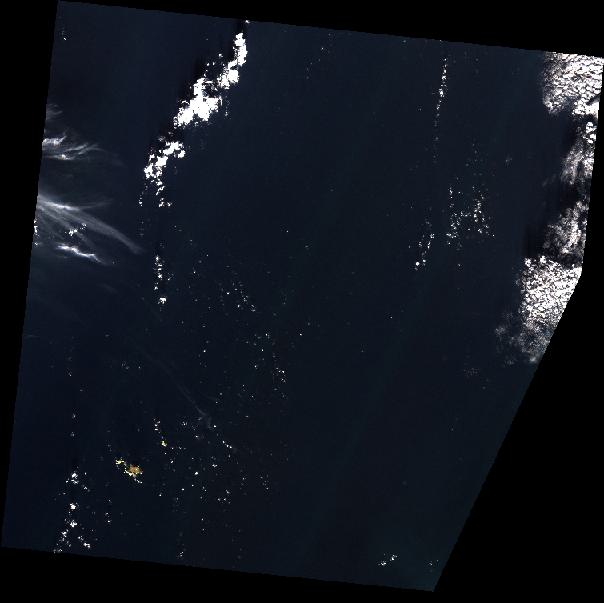

In [19]:
tn_url = None

for item in items[:1]:  # Process only the first item
    
    if not item.assets:
        print("  No assets available.")
    else:
        for asset_key, asset in item.assets.items():
            if asset_key == "thumbnail":
                tn_url = asset.href  # Directly access the href attribute
    
# print(tn_url)

# Here we open the remote URL, read the data and dislay the thumbnail 
with urllib.request.urlopen(tn_url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

## Counting

Sometimes it is useful to know how many collections exist in a catalogue or parent collection. Here we will list the collections in the EODH catalogue, and count the number of sub-collections. 

In [32]:
catalogs = client.get_catalogs()

In [33]:
# number of collections in each catalog
cat_stats = {}
for cat in catalogs:
    cat_stats[cat.id] = len(cat.get_collections())

print(cat_stats)



{'airbus': 4, 'cat_0721004e-fe8a-11ef-a4fd-925b27b1cd31': 4, 'ceda-stac-catalogue': 10, 'commercial': 0, 'earth-search-aws': 1, 'minimalist-stac': 4, 'planet': 6, 'processing-results': 4, 'public': 0, 'sparkgeouser': 4}


Some collections have machine-readablenames whereas others are designed for users to interact with them: they have more intuitive names.

In [ ]:
# Create a dictionary to store collection counts per catalog
cat_stats = {cat.id: len(cat.get_collections()) for cat in catalogs}

# Convert dictionary to Pandas DataFrame
df = pd.DataFrame(list(cat_stats.items()), columns=["Catalog", "Number of Collections"])

# Plot as a bar chart using hvPlot
df.hvplot.bar(x="Catalog", y="Number of Collections", title="Collections per Catalog", 
              xlabel="Catalog", ylabel="Number of Collections", rot=45, height=400, width=600)


:Bars   [Catalog]   (Number of Collections)

# Find out more about the Resource Catalog

If needed, it is also possible to check that the catalogue is available by pinging it - and hopefully getting a positive response. Further, it's also possible to check the API conformance.

In [8]:
print(f"Livecheck: PING-{client.ping()}")
print("\nAPI conforms to:", *client.get_conformance(), sep="\n")

Livecheck: PING-PONG

API conforms to:
https://api.stacspec.org/v1.0.0-rc.1/collection-search
https://api.stacspec.org/v1.0.0/ogcapi-features
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core
http://www.opengis.net/spec/cql2/1.0/conf/cql2-json
http://www.opengis.net/spec/cql2/1.0/conf/advanced-comparison-operators
https://api.stacspec.org/v1.0.0-rc.1/item-search#free-text
https://api.stacspec.org/v1.0.0/item-search#fields
http://www.opengis.net/spec/cql2/1.0/conf/basic-cql2
https://api.stacspec.org/v0.3.0/aggregation
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30
https://api.stacspec.org/v1.0.0-rc.1/ogcapi-features#free-text
https://api.stacspec.org/v1.0.0-rc.2/item-search#filter
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/features-filter
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson
https://api.stacspec.org/v1.0.0/collections
http://www.opengis.net/spec/ogcapi-common-2/1.0

## Tip
You may find that the code and examples [here](https://planetarycomputer.microsoft.com/docs/tutorials/cloudless-mosaic-sentinel2/#Discover-data) can help when looking to get the correct syntax and format for your API calls.